# Set up enviroment

In [1]:
# train:test 9:1 8:2 7:3
TEST_RATIO = 0.3
TRAIN_TEST_LABEL = f'{int(10-TEST_RATIO*10)}-{int(TEST_RATIO*10)}'
DATASET_NAME = 'BIDV'
MODEL_NAME = 'LinearRegression'

In [2]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Start

In [4]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [5]:
# dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/BIDV.csv'
df = pd.read_csv(f'{DATASET_NAME}.csv', index_col="Date")


In [6]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-01 00:00:00+07:00,23001.22852,23354.00781,23001.22852,23177.61914,1634348
2019-03-04 00:00:00+07:00,23354.00781,23812.62109,23283.45313,23706.78906,1375277
2019-03-05 00:00:00+07:00,23424.56445,24906.23828,23424.56445,24412.34766,5974891
2019-03-06 00:00:00+07:00,24412.34766,24624.01563,24271.23633,24518.18164,2411789
2019-03-07 00:00:00+07:00,24694.57031,24870.96094,24482.90234,24624.01563,2413192
2019-03-08 00:00:00+07:00,24306.51367,24482.90234,23918.45508,23989.01172,2563866
2019-03-11 00:00:00+07:00,24059.56836,24059.56836,23600.95508,23742.06641,1611841
2019-03-12 00:00:00+07:00,24059.56836,25047.34961,23847.90039,25047.34961,2395971
2019-03-13 00:00:00+07:00,24906.23828,25364.85156,24835.68359,25117.90625,4054826


In [7]:
print(f"Data shape: {df.shape}")

Data shape: (1306, 5)


## Data preprocessing

### Checking duplicates and null values

In [8]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [9]:
print("Null")
df.isnull().sum()

Null


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Checking DataFrame information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2019-03-01 00:00:00+07:00 to 2024-05-31 00:00:00+07:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1306 non-null   float64
 1   High    1306 non-null   float64
 2   Low     1306 non-null   float64
 3   Close   1306 non-null   float64
 4   Volume  1306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.2+ KB


### Overview Data Descriptive statistic

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,1306.000000,1306.000000,1306.000000,1306.000000,1.306000e+03
mean,33337.503053,33821.588911,32892.856776,33335.271423,2.240560e+06
std,7084.029568,7169.639191,6990.191758,7058.435047,1.640112e+06
min,21590.111330,22225.113280,20813.996090,21590.111330,1.837970e+05
25%,28352.117190,28786.814450,28010.699220,28292.921880,1.188379e+06
50%,31397.382810,31812.937500,30954.343750,31397.382810,1.782868e+06
75%,38601.472660,39045.167970,38235.423833,38601.472660,2.759477e+06
max,54400.000000,56700.000000,53500.000000,54400.000000,1.846408e+07


## Linear Regression Model

### Split Data

In [12]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [13]:
colors = plt.get_cmap('tab10').colors

In [14]:
def allResultPlots(data):
    (x_train, y_train, x_test, y_test, y_pred, x_next_90_days, y_next_90_days) = data

    figname = f'{DATASET_NAME} {TRAIN_TEST_LABEL}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train, color=colors[0])

    # test
    plt.plot(x_test, y_test, color=colors[1])
    plt.plot(x_test, y_pred, color=colors[2])

    # next 90 Days
    # plt.plot(x_next_90_days, y_next_90_days)
    plt.plot(x_next_90_days[0:30],y_next_90_days[0:30], color=colors[3])
    plt.plot(x_next_90_days[30:60],y_next_90_days[30:60], color=colors[4])
    plt.plot(x_next_90_days[60:90],y_next_90_days[60:90], color=colors[5])

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)','Predictions (Next60Days)','Predictions (Next90Days)'])
    
    plot_dir = "plots/result"
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    figname = f'{DATASET_NAME}_{MODEL_NAME}_{TRAIN_TEST_LABEL}'
    plt.savefig(os.path.join(plot_dir, figname + ".png"), bbox_inches='tight')

    plt.show()

In [15]:
def next90DaysPlot(data):
    (x_next_90_days, y_next_90_days) = data

    plt.title("Next 90 Days")
    # plt.plot(x_next_90_days, y_next_90_days)
    plt.plot(x_next_90_days[0:30],y_next_90_days[0:30], color=colors[3])
    plt.plot(x_next_90_days[30:60],y_next_90_days[30:60], color=colors[4])
    plt.plot(x_next_90_days[60:90],y_next_90_days[60:90], color=colors[5])

    # save plots and show
    plt.legend(['Predictions (Next30Days)','Predictions (Next60Days)','Predictions (Next90Days)'])
    # Ensure the directory exists
    plot_dir = "plots/predicted"
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)
    
    figname = f'{DATASET_NAME}_{MODEL_NAME}_{TRAIN_TEST_LABEL}_90Days'
    plt.savefig(os.path.join(plot_dir, figname + ".png"), bbox_inches='tight')
    
    plt.show()

In [16]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [17]:
print("==============================")
print('Test Ratio: ', TEST_RATIO)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(TEST_RATIO)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-90-days====#
print("==============================")
last_index =  df.index[-1]
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
print("Next 90 Days:")
print(y_next_90_days)
#====End-Predick-next-90-days====#

Test Ratio:  0.3
Train:  (914, 1)
Test:  (392, 1)
      Actual_Price  Predicted_Price
914    29993.78906     33933.953206
915    30659.33008     33942.913334
916    30215.63672     33951.873462
917    29905.04883     33960.833590
918    29283.87695     33969.793719
...            ...              ...
1301   48900.00000     37401.522773
1302   49100.00000     37410.482901
1303   48600.00000     37419.443029
1304   47700.00000     37428.403157
1305   47100.00000     37437.363285

[392 rows x 2 columns]
Testing RMSE: 7545.22048587569
Testing MAPE: 0.13755236014079691
Testing MAE: 6125.68205735968
Next 90 Days:
[37446.32341342 37455.2835415  37464.24366958 37473.20379766
 37482.16392574 37491.12405381 37500.08418189 37509.04430997
 37518.00443805 37526.96456613 37535.92469421 37544.88482229
 37553.84495037 37562.80507845 37571.76520653 37580.72533461
 37589.68546269 37598.64559077 37607.60571885 37616.56584693
 37625.52597501 37634.48610309 37643.44623117 37652.40635925
 37661.36648733 376

All Result


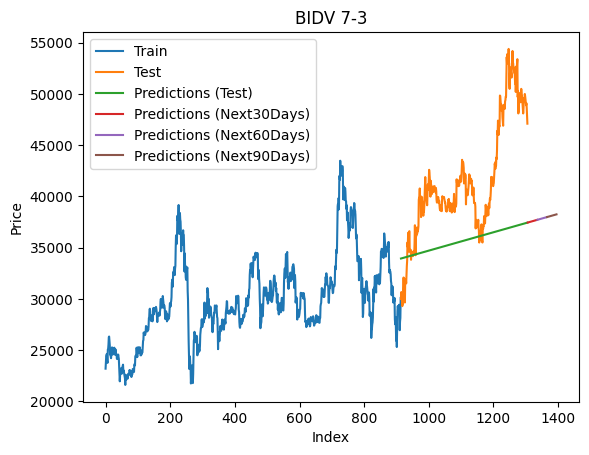

Next 90 days prediction


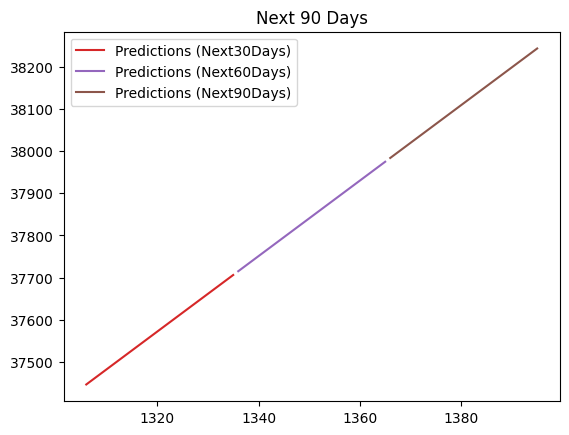

In [18]:
# use plots to display data
# all
print('All Result')
allResultPlots((x_train , y_train, x_test, y_test, y_pred, x_next_90_days, y_next_90_days))
# next 90 Days
print('Next 90 days prediction')
next90DaysPlot((x_next_90_days, y_next_90_days))